In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = "C:/Users/user/Downloads/spam.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1") 

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3391,ham,What r u cooking me for dinner?,NaN,NaN,NaN
4648,ham,Please protect yourself from e-threats. SIB ne...,NaN,NaN,NaN
4091,ham,I remain unconvinced that this isn't an elabor...,NaN,NaN,NaN
3950,ham,Hi dude hw r u da realy mising u today,NaN,NaN,NaN
1438,ham,"Arms fine, how's Cardiff and uni?",NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

In [7]:
# 1 Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Buildin
# 5. Evaluation
# 6. Improvement 
# 7. Website
# 8. Deploy

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# Drop last 3 columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [10]:
df.sample(5)

,v1,v2
526,spam,Today's Offer! Claim ur å£150 worth of discoun...
1653,ham,I was at bugis juz now wat... But now i'm walk...
4409,ham,You also didnt get na hi hi hi hi hi
180,ham,You lifted my hopes with the offer of money. I...
4254,spam,Block Breaker now comes in deluxe format with ...


In [11]:
# Renaming the column
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)
df.head(5)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['Target'] = encoder.fit_transform(df['Target'])

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
# Check for duplicates
df.duplicated().sum()

403

In [17]:
# Remove Duplicates
df= df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

In [20]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

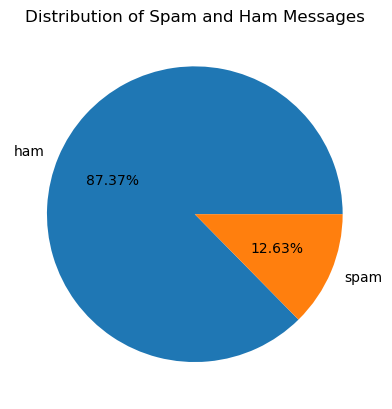

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f%%")
plt.title("Distribution of Spam and Ham Messages")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['Text'].apply(len)

In [27]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
from nltk.tokenize import wordpunct_tokenize , word_tokenize
df['Text'].apply(lambda x: wordpunct_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, don, ', t, think, he, goes, to, usf, ...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [29]:
df['num_words'] = df['Text'].apply(lambda x:len(wordpunct_tokenize(x)))
df

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,42
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,28


In [30]:
import re
df['num_sentences'] = df['Text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

In [31]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,19.202747,1.846779
std,58.236293,13.963696,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,28.000000,3.000000
max,910.000000,210.000000,39.000000


In [32]:
## Ham
df[df['Target'] == 0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.448627,1.692648
std,56.358207,13.769106,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,9.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,210.000000,39.000000


In [33]:
## Spam
df[df['Target'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,31.333844,2.912711
std,30.137753,7.997049,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,28.000000,2.000000
50%,149.000000,33.000000,3.000000
75%,157.000000,36.000000,4.000000
max,224.000000,49.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

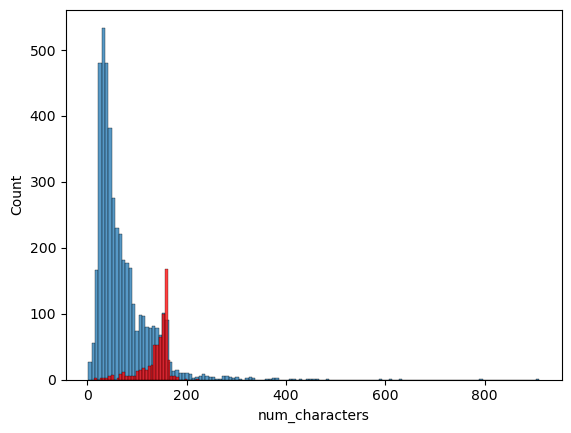

In [35]:
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

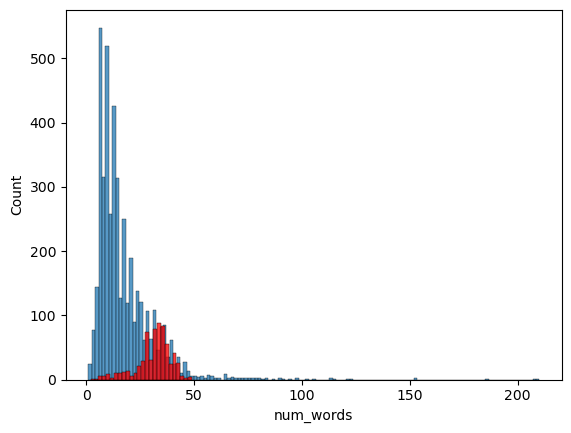

In [36]:
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'red')

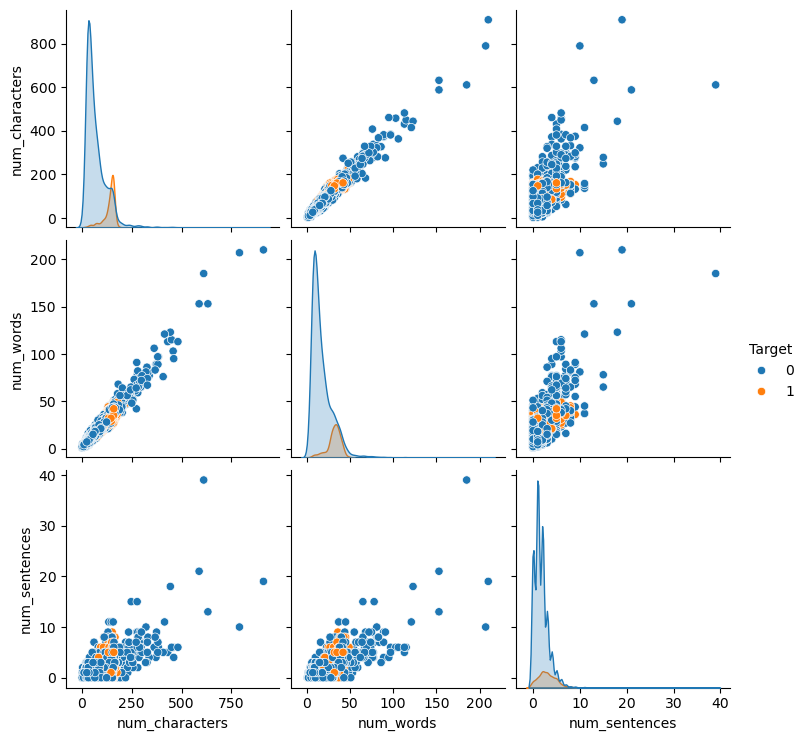

In [37]:
sns.pairplot(df, hue='Target')

<h1>Data preprocessing </h1>
<h3>1) Lower case</h3>
<h3>2) Tokenization</h3>
<h3>3) Removing special characters</h3>
<h3>4) Removing stopwords and puntuation</h3>
<h3>5) Stemming</h3>

In [39]:
import nltk
from nltk.tokenize import wordpunct_tokenize, word_tokenize
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
import nltk
from nltk.tokenize import word_tokenize

In [41]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    return Text

In [42]:
nltk.download('punkt', download_dir='nltk_data')


[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
nltk.download('punkt', download_dir='nltk_data')


[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
import nltk.data
print(nltk.data.find('tokenizers/punkt'))


C:\Users\user\AppData\Roaming\nltk_data\tokenizers\punkt


In [45]:
import re

def simple_tokenizer(text):
    text = text.lower()
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

print(simple_tokenizer("HI how r U?"))
# Output: ['hi', 'how', 'r', 'u']


['hi', 'how', 'r', 'u']


In [46]:
!pip install spacy

In [47]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 3.9 MB/s eta 0:00:04
     ----- ---------------------------------- 1.8/12.8 MB 3.5 MB/s eta 0:00:04
     ------ --------------------------------- 2.1/12.8 MB 2.9 MB/s eta 0:00:04
     ------- -------------------------------- 2.4/12.8 MB 2.6 MB/s eta 0:00:05
     --------- ------------------------------ 2.9/12.8 MB 2.6 MB/s eta 0:00:04
     ----------- ---------------------------- 3.7/12.8 MB 2.5 MB/s eta 0:00:04
     ------------- -------------------------- 4.5/12.8 MB 2.7 MB/s eta 0:00:04
     --------------- ------------------------ 5.0/12.8 MB 2.6 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 2.6 MB/s eta 0:00:03
     ------------------ --------------------- 5.8/12.8 MB 2.6 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.8 MB 2.5 MB/s eta 0:00:03
     --------------------- ------------------ 6.8/12.8 MB 2

In [55]:
import spacy
from nltk.stem import PorterStemmer
import string
import nltk
from nltk.corpus import stopwords
nlp = spacy.load("en_core_web_sm")
stemmer = PorterStemmer()

In [57]:
def transform_text(text):
    # Convert to lowercase and tokenize using spaCy
    doc = nlp(text.lower())
    Text = [token.text for token in doc]
    
    # Step 1: Remove non-alphanumeric characters
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)

    # Step 2: Clear Text and copy y back to Text
    Text = y[:]
    y.clear()

    # Step 3: Remove stopwords and apply stemming
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(stemmer.stem(i))

    return y


In [59]:
print(transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
))


['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']


In [61]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [77]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [82]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,2,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,0,"[nah, think, goe, usf, live, around, though]"


In [86]:
!pip install wordcloud


In [88]:
from wordcloud import WordCloud

In [100]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [102]:
spam_text = df[df['Target'] == 1]['Transformed_text'].apply(lambda x: " ".join(x)).str.cat(sep=" ")

In [104]:
spam_wc = wc.generate(spam_text)

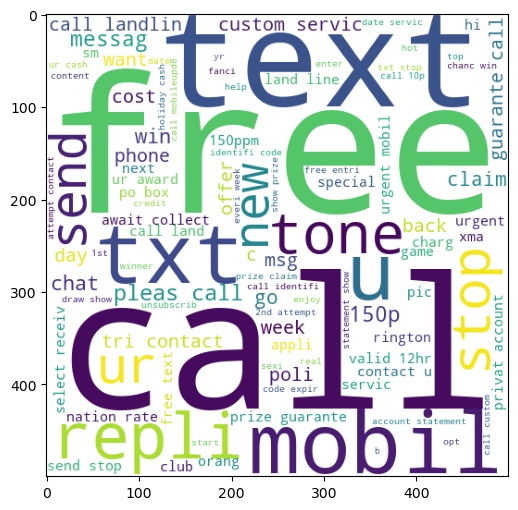

In [108]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [114]:
ham_text = df[df['Target'] == 0]['Transformed_text'].apply(lambda x: " ".join(x)).str.cat(sep=" ")
ham_wc = wc.generate(ham_text)

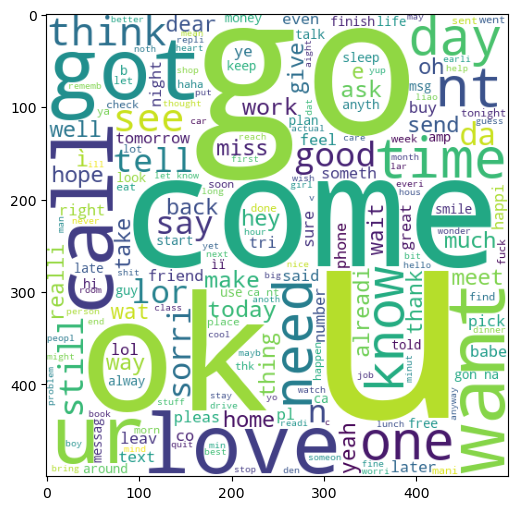

In [115]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [124]:
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    print(msg)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'txt', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', '87575', 'cost', '150p', 'day', '6day', '16', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'tx

In [132]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)


In [134]:
len(spam_corpus)

10306

C:\Users\user\AppData\Local\Temp\ipykernel_12624\2284615511.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_df, x='Frequency', y='Word', palette='magma')


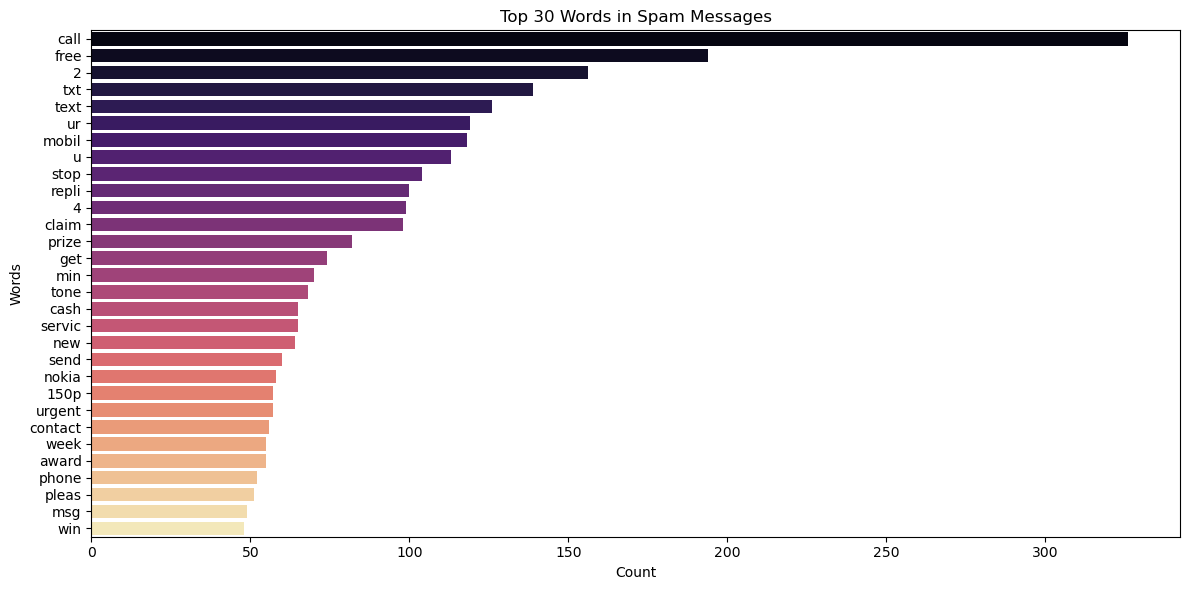

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Get top 30 most common words in spam
spam_counter = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
spam_df = pd.DataFrame(spam_counter, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=spam_df, x='Frequency', y='Word', palette='magma')
plt.title("Top 30 Words in Spam Messages")
plt.xlabel("Count")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


In [170]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)


In [172]:
len(ham_corpus)

34757

C:\Users\user\AppData\Local\Temp\ipykernel_12624\431228017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_df, x='Frequency', y='Word', palette='magma')


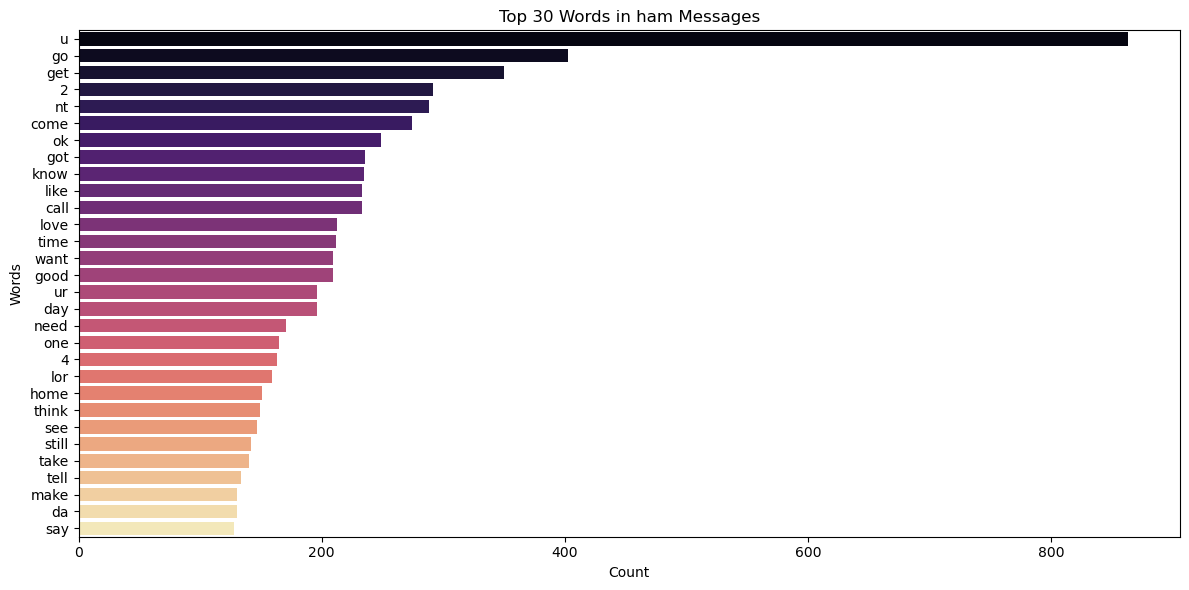

In [184]:
# Get top 30 most common words in spam
ham_counter = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
ham_df = pd.DataFrame(ham_counter, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=ham_df, x='Frequency', y='Word', palette='magma')
plt.title("Top 30 Words in ham Messages")
plt.xlabel("Count")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [186]:
# Text Vectorization
# using Bag of Words
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,2,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,0,"[nah, think, goe, usf, live, around, though]"


<h2>MODEL BUILDING </h2>

In [190]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [198]:
# Convert list of tokens back to strings
df['Transformed_text_str'] = df['Transformed_text'].apply(lambda x: " ".join(x))


X = tfidf.fit_transform(df['Transformed_text_str']).toarray()


In [200]:
X.shape


(5169, 3000)

In [204]:
y = df['Target'].values


In [206]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [210]:
from sklearn.model_selection import train_test_split


In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [212]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [214]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [232]:
# Train the model
gnb.fit(X_train, y_train)

# Predict on test data
y_pred1 = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)

# Print results
print("Model Evaluation: Gaussian Naive Bayes")
print("----------------------------------------")
print(f"Accuracy Score   : {accuracy:.4f}")
print(f" Precision Score  : {precision:.4f}")
print("Confusion Matrix :")
print(conf_matrix)

Model Evaluation: Gaussian Naive Bayes
----------------------------------------
Accuracy Score   : 0.8530
 Precision Score  : 0.4706
Confusion Matrix :
[[770 126]
 [ 26 112]]


In [236]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
# Print results
print("Model Evaluation: Multinomial Naive Bayes")
print("--------------------------------------------")
print(f"Accuracy Score   : {accuracy:.4f}")
print(f"Precision Score  : {precision:.4f}")
print("Confusion Matrix :")
print(conf_matrix)

Model Evaluation: Multinomial Naive Bayes
--------------------------------------------
Accuracy Score   : 0.8530
Precision Score  : 0.4706
Confusion Matrix :
[[770 126]
 [ 26 112]]


In [240]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

# Print results
print("Model Evaluation: Bernoulli Naive Bayes")
print("-------------------------------------------")
print(f"Accuracy Score   : {accuracy:.4f}")
print(f"Precision Score  : {precision:.4f}")
print("Confusion Matrix :")
print(conf_matrix)

Model Evaluation: Bernoulli Naive Bayes
-------------------------------------------
Accuracy Score   : 0.8530
Precision Score  : 0.4706
Confusion Matrix :
[[770 126]
 [ 26 112]]


In [242]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.6/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.6/150.0 MB 4.4 MB/s eta 0:00:34
    --------------------------------------- 3.4/150.0 MB 4.4 MB/s eta 0:00:34
   - -------------------------------------- 4.2/150.0 MB 4.2 MB/s eta 0:00:35
   - -------------------------------------- 5.2/150.0 MB 4.2 MB/s eta 0:00:35
   - -------------------------------------- 6.0/150.0 MB 4.3 MB/s eta 0:00:34
   - -------------------------------------- 7.1/150.0 MB 4.2 MB/s eta 0:00:34
   -- ------------------------------------- 8.1/150.0 MB 4.3 MB/s eta 0:00:33
   -- ------------------------------------- 9.2/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 10.5/150.0 MB 4.5 MB/s eta 0:00:32
   --- ------------------------------------ 11.3/150.0 MB 4.4 MB/s eta

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [273]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [275]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [277]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [282]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [292]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9390715667311412
Precision -  0.831858407079646
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9603960396039604
For  RF
Accuracy -  0.9758220502901354
Precision -  0.991304347826087


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9709864603481625
Precision -  0.9655172413793104
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.849624060150376
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9166666666666666
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306


In [293]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [294]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
5,RF,0.975822,0.991304
8,ETC,0.977756,0.975207
0,SVC,0.975822,0.974790
10,xgb,0.975822,0.966942
6,AdaBoost,0.970986,0.965517
4,LR,0.956480,0.960396
9,GBDT,0.953578,0.916667
7,BgC,0.956480,0.849624


In [295]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [296]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.972921
2,RF,Accuracy,0.975822
3,ETC,Accuracy,0.977756
4,SVC,Accuracy,0.975822
5,xgb,Accuracy,0.975822
6,AdaBoost,Accuracy,0.970986
7,LR,Accuracy,0.956480
8,GBDT,Accuracy,0.953578
9,BgC,Accuracy,0.956480


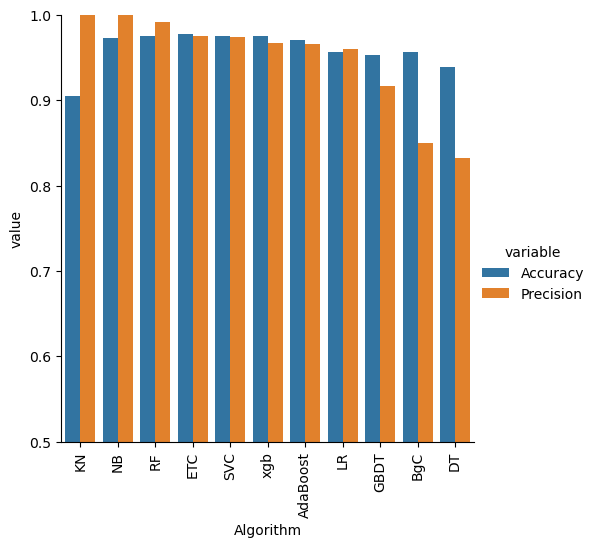

In [297]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [305]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [307]:
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [309]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [311]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [313]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [315]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [317]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [319]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [321]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,RF,0.975822,0.991304,0.975822,0.991304,0.975822,0.991304,0.975822,0.991304
3,ETC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,xgb,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
6,AdaBoost,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517
7,LR,0.956480,0.960396,0.956480,0.960396,0.956480,0.960396,0.956480,0.960396
8,GBDT,0.953578,0.916667,0.953578,0.916667,0.953578,0.916667,0.953578,0.916667
9,BgC,0.956480,0.849624,0.956480,0.849624,0.956480,0.849624,0.956480,0.849624


In [323]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [325]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [327]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [332]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9836065573770492


In [333]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [334]:
from sklearn.ensemble import StackingClassifier


In [335]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))